In [1]:
import pandas as pd # ทำงานกับข้อมูลลักษณะ ตาราง
import numpy as np
import matplotlib.pyplot as pl

In [2]:
import matplotlib.pyplot as plt

In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [4]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [5]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
Covid19 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data mining/covid_19_clean_complete.csv')
Covid19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


- ข้อมูลมีขนาดเท่าไหร่ มีกี่ตัวแปร อะไรบ้าง? ข้อมูลมีการเก็บสถิติการติดโควิดเมื่อใด? (วันเริ่มต้น - วันสุดท้าย)

In [7]:
Covid19.shape

(49068, 10)

In [8]:
Covid19.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [9]:
Covid19['Date'].min()

'2020-01-22'

In [10]:
Covid19['Date'].max()

'2020-07-27'

- สำรวจค่าว่างในข้อมูล ตัวแปรไหนมีค่าสูญหายบ้าง จำนวนเท่าไหร่

In [11]:
Covid19.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

- ทวีปไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [12]:
Data1 = Covid19.groupby('WHO Region')['Confirmed'].sum()
Data1

WHO Region
Africa                    21791827
Americas                 402261194
Eastern Mediterranean     74082892
Europe                   248879793
South-East Asia           55118365
Western Pacific           26374411
Name: Confirmed, dtype: int64

In [13]:
Data1.sort_values(ascending = False)

WHO Region
Americas                 402261194
Europe                   248879793
Eastern Mediterranean     74082892
South-East Asia           55118365
Western Pacific           26374411
Africa                    21791827
Name: Confirmed, dtype: int64

**ทวีปที่มีจำนวนเคส (Confirmed) มากที่สุด คือ Americas  **

- ทวีปไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [14]:
Data2 = Covid19.groupby('WHO Region')['Recovered'].sum()
Data2

WHO Region
Africa                    11193730
Americas                 157069444
Eastern Mediterranean     48050703
Europe                   123202075
South-East Asia           30030327
Western Pacific           18861950
Name: Recovered, dtype: int64

In [15]:
Data2.sort_values(ascending = False)

WHO Region
Americas                 157069444
Europe                   123202075
Eastern Mediterranean     48050703
South-East Asia           30030327
Western Pacific           18861950
Africa                    11193730
Name: Recovered, dtype: int64

**ทวีปที่มีจำนวนผู้หายติด (Recovered) มากที่สุด คือ Americas **

- ทวีปไหนมีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [16]:
Data3 = Covid19.groupby('WHO Region')['Deaths'].sum()
Data3

WHO Region
Africa                     439978
Americas                 19359292
Eastern Mediterranean     1924029
Europe                   19271040
South-East Asia           1458134
Western Pacific            932430
Name: Deaths, dtype: int64

In [17]:
Data3.sort_values(ascending = False)

WHO Region
Americas                 19359292
Europe                   19271040
Eastern Mediterranean     1924029
South-East Asia           1458134
Western Pacific            932430
Africa                     439978
Name: Deaths, dtype: int64

**ทวีปที่มีมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด คือ Americas **

- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='WHO Region'>

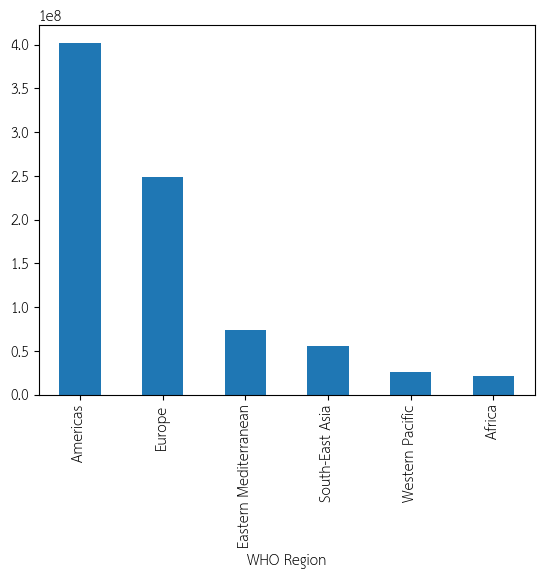

In [18]:
Data1.sort_values(ascending = False).plot.bar()

<Axes: xlabel='WHO Region'>

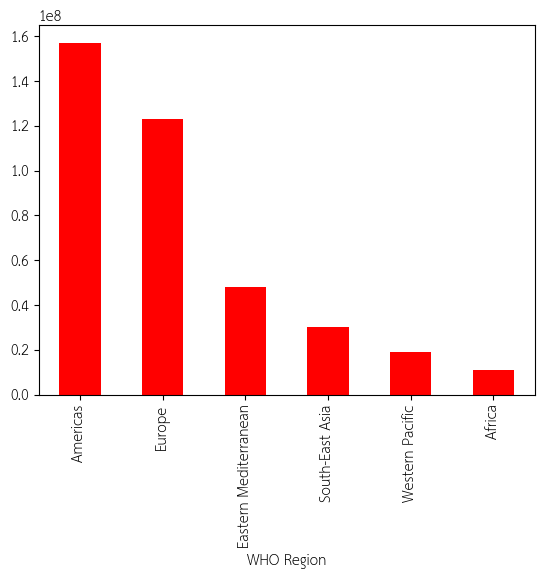

In [19]:
Data2.sort_values(ascending = False).plot.bar(color='red')

<Axes: xlabel='WHO Region'>

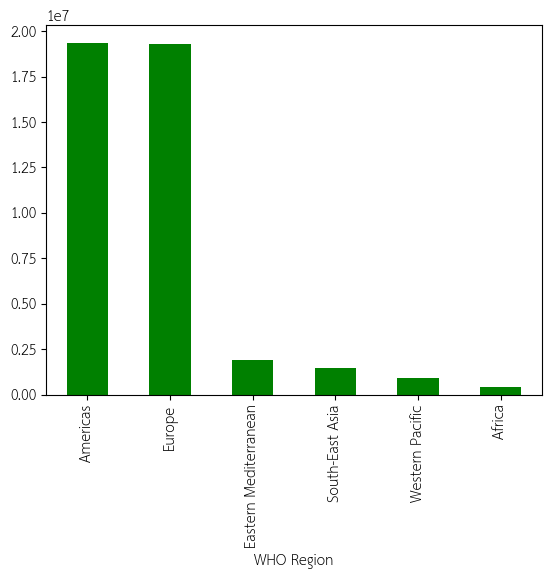

In [20]:
Data3.sort_values(ascending = False).plot.bar(color='green')

- ประเทศไหนมีจำนวนเคส (Confirmed) มากที่สุด

In [21]:
Data4 = Covid19.groupby('Country/Region')['Confirmed'].sum()
Data4

Country/Region
Afghanistan           1936390
Albania                196702
Algeria               1179755
Andorra                 94404
Angola                  22662
                       ...   
West Bank and Gaza     233461
Western Sahara            901
Yemen                   67180
Zambia                 129421
Zimbabwe                50794
Name: Confirmed, Length: 187, dtype: int64

In [22]:
Data4.sort_values(ascending = False)

Country/Region
US                       224345948
Brazil                    89524967
Russia                    45408411
India                     40883464
Spain                     27404045
                           ...    
Saint Kitts and Nevis         1772
Greenland                     1507
Holy See                      1356
Papua New Guinea              1185
Western Sahara                 901
Name: Confirmed, Length: 187, dtype: int64

**ประเทศที่มีจำนวนเคส (Confirmed) มากที่สุด คือ US **

- ประเทศไหนมีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด

In [23]:
Data5 = Covid19.groupby('Country/Region')['Deaths'].sum()
Data5

Country/Region
Afghanistan           49098
Albania                5708
Algeria               77972
Andorra                5423
Angola                 1078
                      ...  
West Bank and Gaza     1370
Western Sahara           63
Yemen                 17707
Zambia                 2643
Zimbabwe                881
Name: Deaths, Length: 187, dtype: int64

In [24]:
Data5.sort_values(ascending = False)

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
                    ...   
Bhutan                   0
Mongolia                 0
Timor-Leste              0
Seychelles               0
Greenland                0
Name: Deaths, Length: 187, dtype: int64

**ประเทศที่มีจำนวนผู้เสียชีวิต (Deaths) มากที่สุด คือ US **

- ประเทศไหนมีจำนวนผู้หายติด (Recovered) มากที่สุด

In [25]:
Data6 = Covid19.groupby('Country/Region')['Recovered'].sum()
Data6

Country/Region
Afghanistan           798240
Albania               118877
Algeria               755897
Andorra                69074
Angola                  6573
                       ...  
West Bank and Gaza     61124
Western Sahara           648
Yemen                  23779
Zambia                 83611
Zimbabwe               12207
Name: Recovered, Length: 187, dtype: int64

In [26]:
Data6.sort_values(ascending = False)

Country/Region
US             56353416
Brazil         54492873
Russia         25120448
India          23783720
Germany        17107839
                 ...   
Timor-Leste           0
Mozambique            0
Syria                 0
Sweden                0
Canada                0
Name: Recovered, Length: 187, dtype: int64

**ประเทศที่มีจำนวนผู้หายติด (Recovered) มากที่สุด คือ US **

- สร้าง Visualization ของค่าสถิติทั้งสามด้านบน เรียงจากจำนวนมากไปน้อย

<Axes: xlabel='Country/Region'>

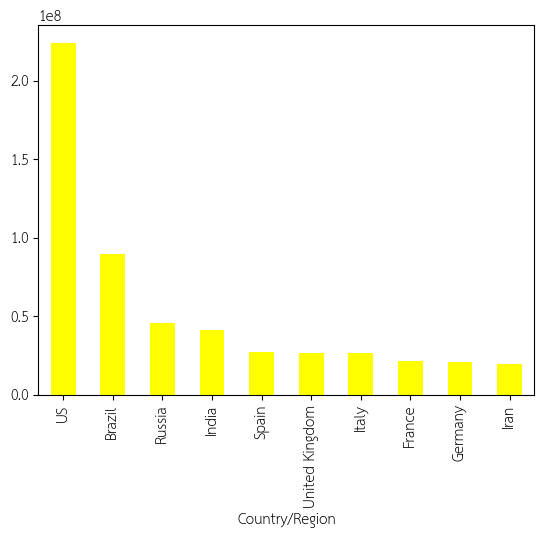

In [29]:
Data4.sort_values(ascending = False).iloc[0:10].plot.bar(color='yellow')

<Axes: xlabel='Country/Region'>

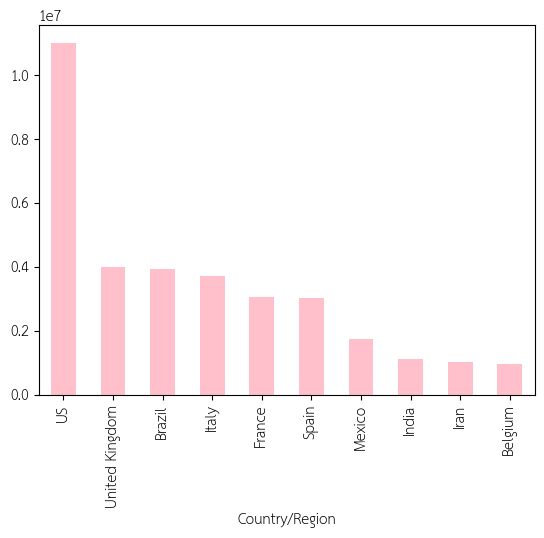

In [30]:
Data5.sort_values(ascending = False).iloc[0:10].plot.bar(color='pink')

<Axes: xlabel='Country/Region'>

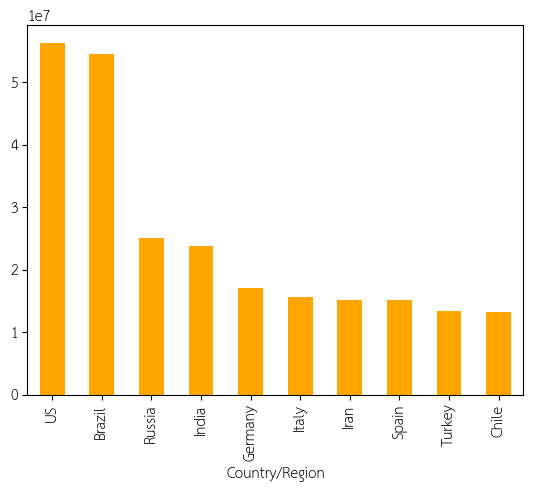

In [31]:
Data6.sort_values(ascending = False).iloc[0:10].plot.bar(color='orange')

- สรุปข้อมูลโควิดประจำวันของประเทศไทย

In [33]:
Data7 = Covid19[Covid19['Country/Region']=='Thailand']
Data7

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
207,NaN,Thailand,15.870032,100.992541,2020-01-22,2,0,0,2,South-East Asia
468,NaN,Thailand,15.870032,100.992541,2020-01-23,3,0,0,3,South-East Asia
729,NaN,Thailand,15.870032,100.992541,2020-01-24,5,0,0,5,South-East Asia
990,NaN,Thailand,15.870032,100.992541,2020-01-25,7,0,0,7,South-East Asia
1251,NaN,Thailand,15.870032,100.992541,2020-01-26,8,0,2,6,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47970,NaN,Thailand,15.870032,100.992541,2020-07-23,3279,58,3107,114,South-East Asia
48231,NaN,Thailand,15.870032,100.992541,2020-07-24,3279,58,3107,114,South-East Asia
48492,NaN,Thailand,15.870032,100.992541,2020-07-25,3282,58,3109,115,South-East Asia
48753,NaN,Thailand,15.870032,100.992541,2020-07-26,3291,58,3109,124,South-East Asia


In [34]:
Data7.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000
mean,1.587003e+01,1.009925e+02,1949.611702,33.452128,1661.489362,254.670213
std,3.562200e-15,1.424880e-14,1388.252687,26.313268,1378.750684,408.483772
min,1.587003e+01,1.009925e+02,2.000000,0.000000,0.000000,2.000000
25%,1.587003e+01,1.009925e+02,50.000000,1.000000,31.000000,22.750000
50%,1.587003e+01,1.009925e+02,2907.000000,51.000000,2547.000000,78.000000
75%,1.587003e+01,1.009925e+02,3125.000000,58.000000,2982.500000,177.000000
max,1.587003e+01,1.009925e+02,3297.000000,58.000000,3111.000000,1451.000000


<ipython-input-36-a6b87b742831>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  Data7.plot.line(x='Date', y={'Confirmed', 'Deaths', 'Recovered'})


<Axes: xlabel='Date'>

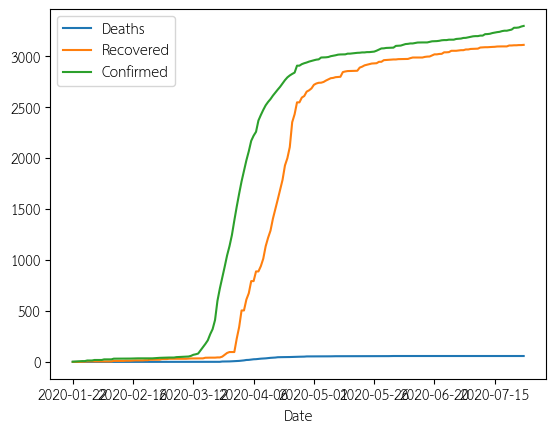

In [36]:
Data7.plot.line(x='Date', y={'Confirmed', 'Deaths', 'Recovered'})

- สรุปข้อมูลโควิดประจำวันของประเทศไทย ในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์

In [55]:
DataBefore = Data7[(Data7['Date']>='2020-04-06') & (Data7['Date']<='2020-04-12')]
DataBefore

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
19782,NaN,Thailand,15.870032,100.992541,2020-04-06,2220,26,793,1401,South-East Asia
20043,NaN,Thailand,15.870032,100.992541,2020-04-07,2258,27,888,1343,South-East Asia
20304,NaN,Thailand,15.870032,100.992541,2020-04-08,2369,30,888,1451,South-East Asia
20565,NaN,Thailand,15.870032,100.992541,2020-04-09,2423,32,940,1451,South-East Asia
20826,NaN,Thailand,15.870032,100.992541,2020-04-10,2473,33,1013,1427,South-East Asia
21087,NaN,Thailand,15.870032,100.992541,2020-04-11,2518,35,1135,1348,South-East Asia
21348,NaN,Thailand,15.870032,100.992541,2020-04-12,2551,38,1218,1295,South-East Asia


In [56]:
DataBefore.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.587003e+01,1.009925e+02,2401.714286,31.571429,982.142857,1388.000000
std,1.918685e-15,1.534948e-14,126.548692,4.276180,150.123758,60.417988
min,1.587003e+01,1.009925e+02,2220.000000,26.000000,793.000000,1295.000000
25%,1.587003e+01,1.009925e+02,2313.500000,28.500000,888.000000,1345.500000
50%,1.587003e+01,1.009925e+02,2423.000000,32.000000,940.000000,1401.000000
75%,1.587003e+01,1.009925e+02,2495.500000,34.000000,1074.000000,1439.000000
max,1.587003e+01,1.009925e+02,2551.000000,38.000000,1218.000000,1451.000000


In [57]:
DataBetween = Data7[(Data7['Date']>='2020-04-13') & (Data7['Date']<='2020-04-18')]
DataBetween

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
21609,NaN,Thailand,15.870032,100.992541,2020-04-13,2579,40,1288,1251,South-East Asia
21870,NaN,Thailand,15.870032,100.992541,2020-04-14,2613,41,1405,1167,South-East Asia
22131,NaN,Thailand,15.870032,100.992541,2020-04-15,2643,43,1497,1103,South-East Asia
22392,NaN,Thailand,15.870032,100.992541,2020-04-16,2672,46,1593,1033,South-East Asia
22653,NaN,Thailand,15.870032,100.992541,2020-04-17,2700,47,1689,964,South-East Asia
22914,NaN,Thailand,15.870032,100.992541,2020-04-18,2733,47,1787,899,South-East Asia


In [58]:
DataBetween.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,15.870032,100.992541,2656.666667,44.000000,1543.166667,1069.500000
std,0.000000,0.000000,56.683919,3.098387,184.139530,130.463405
min,15.870032,100.992541,2579.000000,40.000000,1288.000000,899.000000
25%,15.870032,100.992541,2620.500000,41.500000,1428.000000,981.250000
50%,15.870032,100.992541,2657.500000,44.500000,1545.000000,1068.000000
75%,15.870032,100.992541,2693.000000,46.750000,1665.000000,1151.000000
max,15.870032,100.992541,2733.000000,47.000000,1787.000000,1251.000000


In [59]:
DataAfter = Data7[(Data7['Date']>='2020-04-19') & (Data7['Date']<='2020-04-25')]
DataAfter

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
23175,NaN,Thailand,15.870032,100.992541,2020-04-19,2765,47,1928,790,South-East Asia
23436,NaN,Thailand,15.870032,100.992541,2020-04-20,2792,47,1999,746,South-East Asia
23697,NaN,Thailand,15.870032,100.992541,2020-04-21,2811,48,2108,655,South-East Asia
23958,NaN,Thailand,15.870032,100.992541,2020-04-22,2826,49,2352,425,South-East Asia
24219,NaN,Thailand,15.870032,100.992541,2020-04-23,2839,50,2430,359,South-East Asia
24480,NaN,Thailand,15.870032,100.992541,2020-04-24,2907,51,2547,309,South-East Asia
24741,NaN,Thailand,15.870032,100.992541,2020-04-25,2907,51,2547,309,South-East Asia


In [60]:
DataAfter.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000
mean,1.587003e+01,1.009925e+02,2835.285714,49.000000,2273.000000,513.285714
std,1.918685e-15,1.534948e-14,54.450939,1.732051,258.962031,210.504722
min,1.587003e+01,1.009925e+02,2765.000000,47.000000,1928.000000,309.000000
25%,1.587003e+01,1.009925e+02,2801.500000,47.500000,2053.500000,334.000000
50%,1.587003e+01,1.009925e+02,2826.000000,49.000000,2352.000000,425.000000
75%,1.587003e+01,1.009925e+02,2873.000000,50.500000,2488.500000,700.500000
max,1.587003e+01,1.009925e+02,2907.000000,51.000000,2547.000000,790.000000


*เอาค่าเฉลี่ยของ Confirmed Deaths และ Recovered มาเปรียบเทียบกันในช่วงก่อนเทศกาลสงกรานต์หนึ่งสัปดาห์ ระหว่างเทศกาลสงกรานต์ (13-18 เม.ย.) และหลังเทศกาลสงกรานต์หนึ่งสัปดาห์*

In [61]:
df = pd.DataFrame({"Confirmed" : [2401.714286, 2656.666667, 2835.285714],
                   "Deaths" : [31.571429, 44.000000, 49.000000],
                   "Recovered" : [982.142857, 1543.166667, 2273.000000]},
                  index = ["DataBefore", "DataBetween", "DataAfter"])
df

,Confirmed,Deaths,Recovered
DataBefore,2401.714286,31.571429,982.142857
DataBetween,2656.666667,44.000000,1543.166667
DataAfter,2835.285714,49.000000,2273.000000


<Axes: >

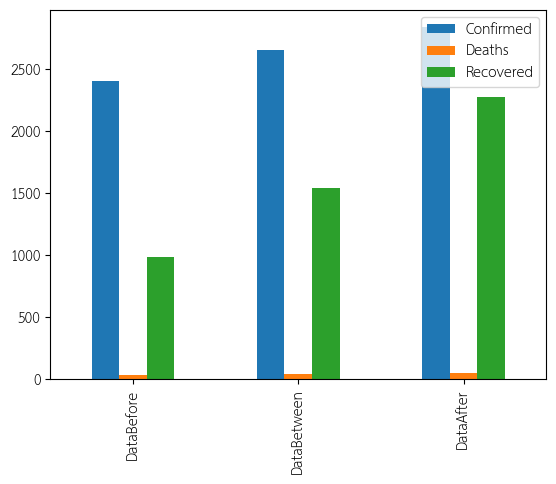

In [62]:
df.plot.bar()